In [1]:
#!pip install holidays

# Dataset info.
### train 데이터 : 2019년 01월 01일부터 2023년 03월 03일까지의 유통된 품목의 가격 데이터
- item: 품목 코드
> - 🍊 TG : 감귤 (Tangerine)
> - 🥦 BC : 브로콜리 (Broccoli)
> - RD : 무 (Radish)
> - 🥕 CR : 당근 (Carrot)
> - 🥬 CB : 양배추 (Cabbage)
- corporation : 유통 법인 코드
- 법인 A부터 F 존재
- location : 지역 코드
> - J : 제주도 제주시 (Jeju-si, Jeju-do)
> - S : 제주도 서귀포시 (Seogwipo-si, Jeju-do)
- supply(kg) : 유통된 물량, kg 단위
- price(원/kg) : 유통된 품목들의 kg 마다의 가격, 원 단위
- TG: Tangerine BC: Broccoli RD: Radish CR: Carrot CB: Cabbage corporation: Distribution corporation code Corporations A to F exist location: Region code J: Jeju-si, Jeju-do S: Seogwipo-si, Jeju-do supply(kg): Distributed quantity, price in kg ( Won/kg): Price per kg of distributed items, won unit

In [2]:
import pandas as pd
import numpy as np
import datetime
import holidays
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rc('font', family='NanumGothic')

from sklearn.preprocessing import LabelEncoder

# Loading data

In [3]:
traindf = pd.read_csv('./data/train.csv', parse_dates= True, index_col='timestamp')

In [4]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [5]:
train.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [6]:
test.head()

,ID,timestamp,item,corporation,location
0,TG_A_J_20230304,2023-03-04,TG,A,J
1,TG_A_J_20230305,2023-03-05,TG,A,J
2,TG_A_J_20230306,2023-03-06,TG,A,J
3,TG_A_J_20230307,2023-03-07,TG,A,J
4,TG_A_J_20230308,2023-03-08,TG,A,J


In [7]:
traindf.head()

,ID,item,corporation,location,supply(kg),price(원/kg)
timestamp,,,,,,
2019-01-01,TG_A_J_20190101,TG,A,J,0.0,0.0
2019-01-02,TG_A_J_20190102,TG,A,J,0.0,0.0
2019-01-03,TG_A_J_20190103,TG,A,J,60601.0,1728.0
2019-01-04,TG_A_J_20190104,TG,A,J,25000.0,1408.0
2019-01-05,TG_A_J_20190105,TG,A,J,32352.0,1250.0


In [8]:
traindf.rename(columns = {'price(원/kg)': 'price(krw/kg)'}, inplace=True)
train.rename(columns={'price(원/kg)': 'price(krw/kg)'}, inplace=True)
train.head()

,ID,timestamp,item,corporation,location,supply(kg),price(krw/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


# EDA

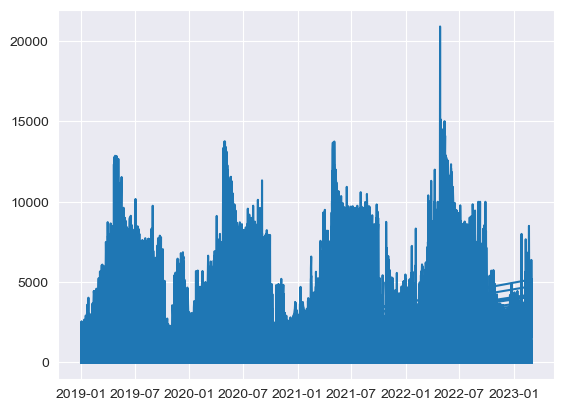

In [9]:
plt.plot('price(krw/kg)', data = traindf)

<Axes: xlabel='timestamp', ylabel='price(krw/kg)'>

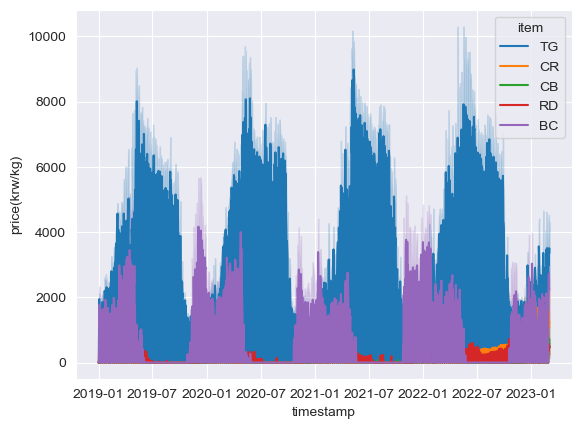

In [10]:
sns.lineplot(data = traindf, x = traindf.index, y = 'price(krw/kg)', hue='item')

In [11]:
supply_monthly = traindf.loc[:, 'supply(kg)':'price(krw/kg)'].resample('1M').sum()
supply_monthly

,supply(kg),price(krw/kg)
timestamp,,
2019-01-31,34864497.70,1020148.0
2019-02-28,22833537.30,990235.0
2019-03-31,23814324.70,1651492.0
2019-04-30,20930996.50,1677857.0
2019-05-31,13546679.00,1885723.0
2019-06-30,2858976.50,1486277.0
2019-07-31,603074.00,1395846.0
2019-08-31,518709.30,1303680.0
2019-09-30,978326.10,1026362.0


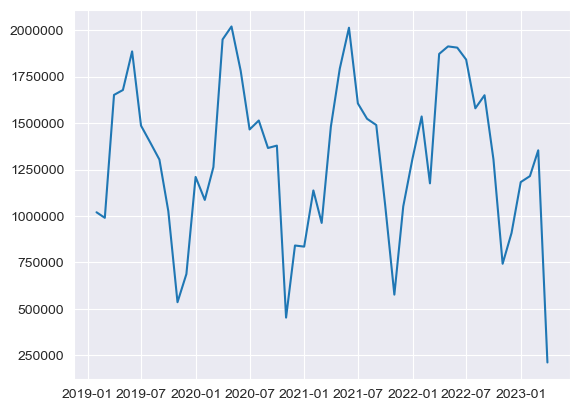

In [12]:
plt.plot('price(krw/kg)', data=supply_monthly)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

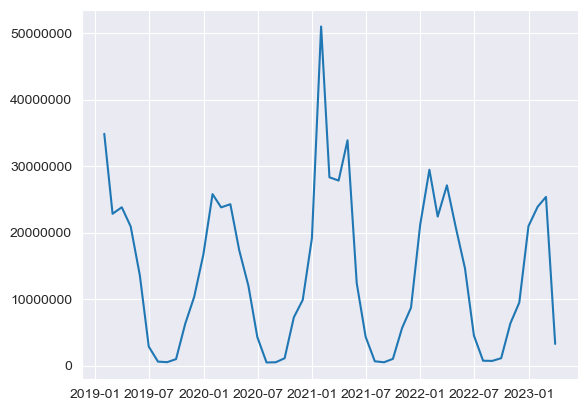

In [13]:
plt.plot('supply(kg)', data=supply_monthly)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

In [14]:
supply_yearly = traindf.loc[:, 'supply(kg)':'price(krw/kg)'].resample('1Y').sum()
supply_yearly

,supply(kg),price(krw/kg)
timestamp,,
2019-12-31,1.542736e+08,14872095.0
2020-12-31,1.458630e+08,15954082.0
2021-12-31,1.955378e+08,16000692.0
2022-12-31,1.582975e+08,17611420.0
2023-12-31,5.252717e+07,2780148.0


<Axes: xlabel='timestamp'>

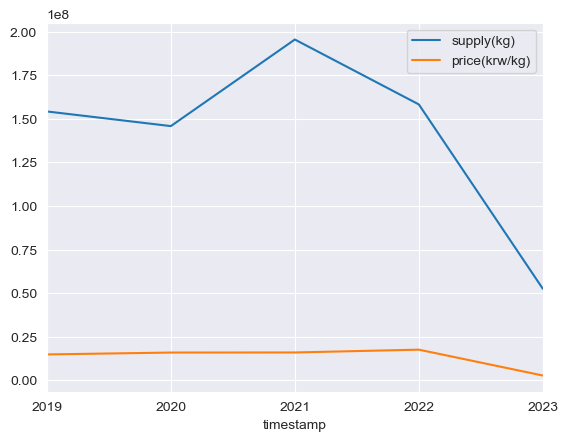

In [15]:
supply_yearly.plot(kind = 'line')

In [16]:
train.isnull().sum()

ID               0
timestamp        0
item             0
corporation      0
location         0
supply(kg)       0
price(krw/kg)    0
dtype: int64

### 품목 별 가격 분포 (Price distribution by item)

<Axes: xlabel='item', ylabel='price(krw/kg)'>

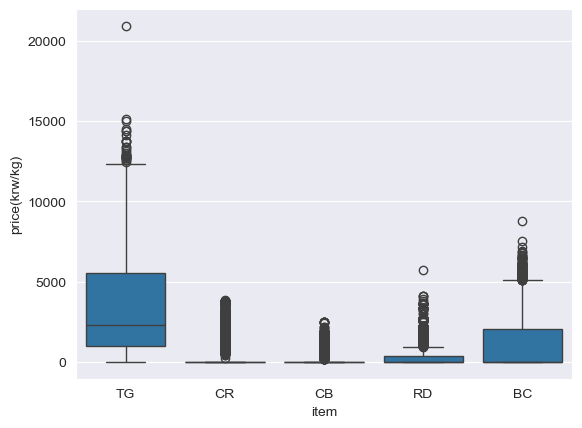

In [17]:
sns.boxplot(x='item',y='price(krw/kg)',data=train)

### 법인 별 가격 분포 (Price distribution by corporation)

<Axes: xlabel='corporation', ylabel='price(krw/kg)'>

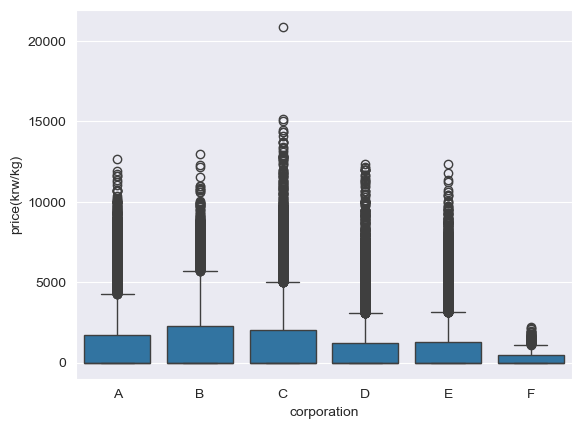

In [18]:
sns.boxplot(x='corporation',y='price(krw/kg)',data=train)

### location별 가격 분포 (Star price distribution)

<Axes: xlabel='location', ylabel='price(krw/kg)'>

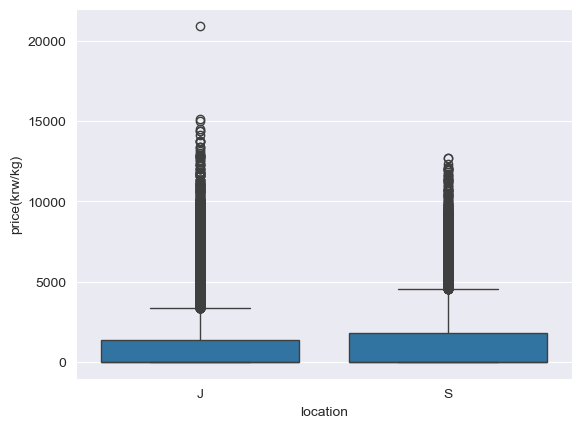

In [19]:
sns.boxplot(x='location',y='price(krw/kg)',data=train)

# Preprocessing

In [20]:
def preprocessing(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    
    #timestamp -> year, month, day
    
    df['year']=df['timestamp'].dt.year
    df['month']=df['timestamp'].dt.month
    df['day']=df['timestamp'].dt.day
    df['dayofweek']=df['timestamp'].dt.dayofweek # 요일 추가
    df['dayofyear']=df['timestamp'].dt.dayofyear
    df['week_of_year']=df['timestamp'].dt.isocalendar().week # 몇 주인지 추가
    
    # ID의 정보는 item-corporation-location이므로 중복으로 넣어줄 필요 없음
    df.drop(columns = ['ID'],axis=1,inplace=True) 
    
    # location encoding
    location_mapping={'J':0,'S':1}
    df['location'] = df['location'].map(location_mapping)  
    
    # corporation encoding
    corporation_mapping={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6}
    df['corporation'] = df['corporation'].map(corporation_mapping)
    
    
    # 편의상 변경
    df.rename(columns={'price(krw/kg)':'price'},inplace=True)
    
    
    # holiday(공휴일) 컬럼 생성
    def isHoliday(x):
        kr_holiday=holidays.KR()
        
        if x in kr_holiday:
            return 1
        else:
            return 0    
    df['holiday'] = df.index.map(lambda x:isHoliday(x))
    
    
    
    # 품목 별로 데이터프레임 나누기
    df_tg = df[df['item']=='TG'].copy().reset_index(drop=True)
    df_bc = df[df['item']=='BC'].copy().reset_index(drop=True)
    df_rd = df[df['item']=='RD'].copy().reset_index(drop=True)
    df_cr = df[df['item']=='CR'].copy().reset_index(drop=True)
    df_cb = df[df['item']=='CB'].copy().reset_index(drop=True)
    
    return df_tg,df_bc,df_rd,df_cr,df_cb

In [21]:
# train 데이터 기본 전처리
df_tg,df_bc,df_rd,df_cr,df_cb = preprocessing(train)

In [22]:
print('tangerines:',df_tg.shape[0])
print('broccolis:',df_bc.shape[0])
print('raddish:',df_rd.shape[0])
print('carrots:',df_cr.shape[0])
print('cabbages:',df_cb.shape[0])

tangerines: 15230
broccolis: 13707
raddish: 12184
carrots: 10661
cabbages: 7615


In [23]:
tg_min_date = df_tg['timestamp'].min()
tg_max_date = df_tg['timestamp'].max()
display(f"Citrus Data Period : {tg_min_date} ~ {tg_max_date}")

bc_min_date = df_bc['timestamp'].min()
bc_max_date = df_bc['timestamp'].max()
display(f"Broccoli Data Period : {bc_min_date} ~ {bc_max_date}")

rd_min_date = df_rd['timestamp'].min()
rd_max_date = df_rd['timestamp'].max()
display(f"Raddish Data Period : {rd_min_date} ~ {rd_max_date}")

cr_min_date = df_cr['timestamp'].min()
cr_max_date = df_cr['timestamp'].max()
display(f"Carrot Data Period : {cr_min_date} ~ {cr_max_date}")

cb_min_date = df_cb['timestamp'].min()
cb_max_date = df_cb['timestamp'].max()
display(f"Cabbage Data Period : {cb_min_date} ~ {cb_max_date}")

'Citrus Data Period : 2019-01-01 00:00:00 ~ 2023-03-03 00:00:00'

'Broccoli Data Period : 2019-01-01 00:00:00 ~ 2023-03-03 00:00:00'

'Raddish Data Period : 2019-01-01 00:00:00 ~ 2023-03-03 00:00:00'

'Carrot Data Period : 2019-01-01 00:00:00 ~ 2023-03-03 00:00:00'

'Cabbage Data Period : 2019-01-01 00:00:00 ~ 2023-03-03 00:00:00'

# 로그 수익률 추가 (Add log return)

In [24]:
def log_price(df):
    tmp=df.copy()
    tmp['price']=tmp['price'].replace(0,1)
    tmp['price_log'] = np.log(tmp['price'])
    df['diff'] = (tmp['price_log'] - tmp['price_log'].shift(1)).shift(-1)
    
    return df

In [25]:
df_tg=log_price(df_tg)
df_tg.head()

,timestamp,item,corporation,location,supply(kg),price,year,month,day,dayofweek,dayofyear,week_of_year,holiday,diff
0,2019-01-01,TG,1,0,0.0,0.0,2019,1,1,1,1,1,1,0.000000
1,2019-01-02,TG,1,0,0.0,0.0,2019,1,2,2,2,1,1,7.454720
2,2019-01-03,TG,1,0,60601.0,1728.0,2019,1,3,3,3,1,1,-0.204794
3,2019-01-04,TG,1,0,25000.0,1408.0,2019,1,4,4,4,1,1,-0.119027
4,2019-01-05,TG,1,0,32352.0,1250.0,2019,1,5,5,5,1,1,-7.130899


In [26]:
df_bc=log_price(df_bc)
df_bc.head()

,timestamp,item,corporation,location,supply(kg),price,year,month,day,dayofweek,dayofyear,week_of_year,holiday,diff
0,2019-01-01,BC,1,0,0.0,0.0,2019,1,1,1,1,1,1,0.000000
1,2019-01-02,BC,1,0,0.0,0.0,2019,1,2,2,2,1,1,7.847372
2,2019-01-03,BC,1,0,7616.0,2559.0,2019,1,3,3,3,1,1,-0.053785
3,2019-01-04,BC,1,0,7488.0,2425.0,2019,1,4,4,4,1,1,-0.145324
4,2019-01-05,BC,1,0,10408.0,2097.0,2019,1,5,5,5,1,1,-7.648263


In [27]:
df_rd=log_price(df_rd)
df_rd.head()

,timestamp,item,corporation,location,supply(kg),price,year,month,day,dayofweek,dayofyear,week_of_year,holiday,diff
0,2019-01-01,RD,1,0,0.0,0.0,2019,1,1,1,1,1,1,0.000000
1,2019-01-02,RD,1,0,0.0,0.0,2019,1,2,2,2,1,1,5.905362
2,2019-01-03,RD,1,0,37060.0,367.0,2019,1,3,3,3,1,1,0.225865
3,2019-01-04,RD,1,0,19260.0,460.0,2019,1,4,4,4,1,1,-0.134774
4,2019-01-05,RD,1,0,32140.0,402.0,2019,1,5,5,5,1,1,-5.996452


In [28]:
df_cr=log_price(df_cr)
df_cr.head()

,timestamp,item,corporation,location,supply(kg),price,year,month,day,dayofweek,dayofyear,week_of_year,holiday,diff
0,2019-01-01,CR,1,0,0.0,0.0,2019,1,1,1,1,1,1,0.000000
1,2019-01-02,CR,1,0,0.0,0.0,2019,1,2,2,2,1,1,0.000000
2,2019-01-03,CR,1,0,0.0,0.0,2019,1,3,3,3,1,1,7.039660
3,2019-01-04,CR,1,0,10240.0,1141.0,2019,1,4,4,4,1,1,-0.007036
4,2019-01-05,CR,1,0,8680.0,1133.0,2019,1,5,5,5,1,1,-7.032624


In [29]:
df_cb=log_price(df_cb)
df_cb.head()

,timestamp,item,corporation,location,supply(kg),price,year,month,day,dayofweek,dayofyear,week_of_year,holiday,diff
0,2019-01-01,CB,1,0,0.0,0.0,2019,1,1,1,1,1,1,0.000000
1,2019-01-02,CB,1,0,0.0,0.0,2019,1,2,2,2,1,1,0.000000
2,2019-01-03,CB,1,0,0.0,0.0,2019,1,3,3,3,1,1,0.000000
3,2019-01-04,CB,1,0,0.0,0.0,2019,1,4,4,4,1,1,5.924256
4,2019-01-05,CB,1,0,4112.0,374.0,2019,1,5,5,5,1,1,-5.924256


# 각 품목별 그래프 (Graph for each item)

In [30]:
def graph(df):
    fig,axes=plt.subplots(2,2,figsize=(18,15))
    sns.barplot(data=df,x='year',y='price',ax=axes[0,0],palette='husl')
    sns.barplot(data=df,x='month',y='price',ax=axes[0,1])
    sns.boxplot(x='corporation',y='price',data=df,ax=axes[1,0])
    sns.boxplot(x='location',y='price',data=df,ax=axes[1,1])
    
def plot(df):
    fig, axes = plt.subplots(2, 1, figsize = (18, 14))
    sns.lineplot(data = df, x  = 'year', y = 'price', ax = axes[0])
    sns.lineplot(data = df, x  = 'month', y = 'price', ax = axes[1])

### 감귤 (tangerines)

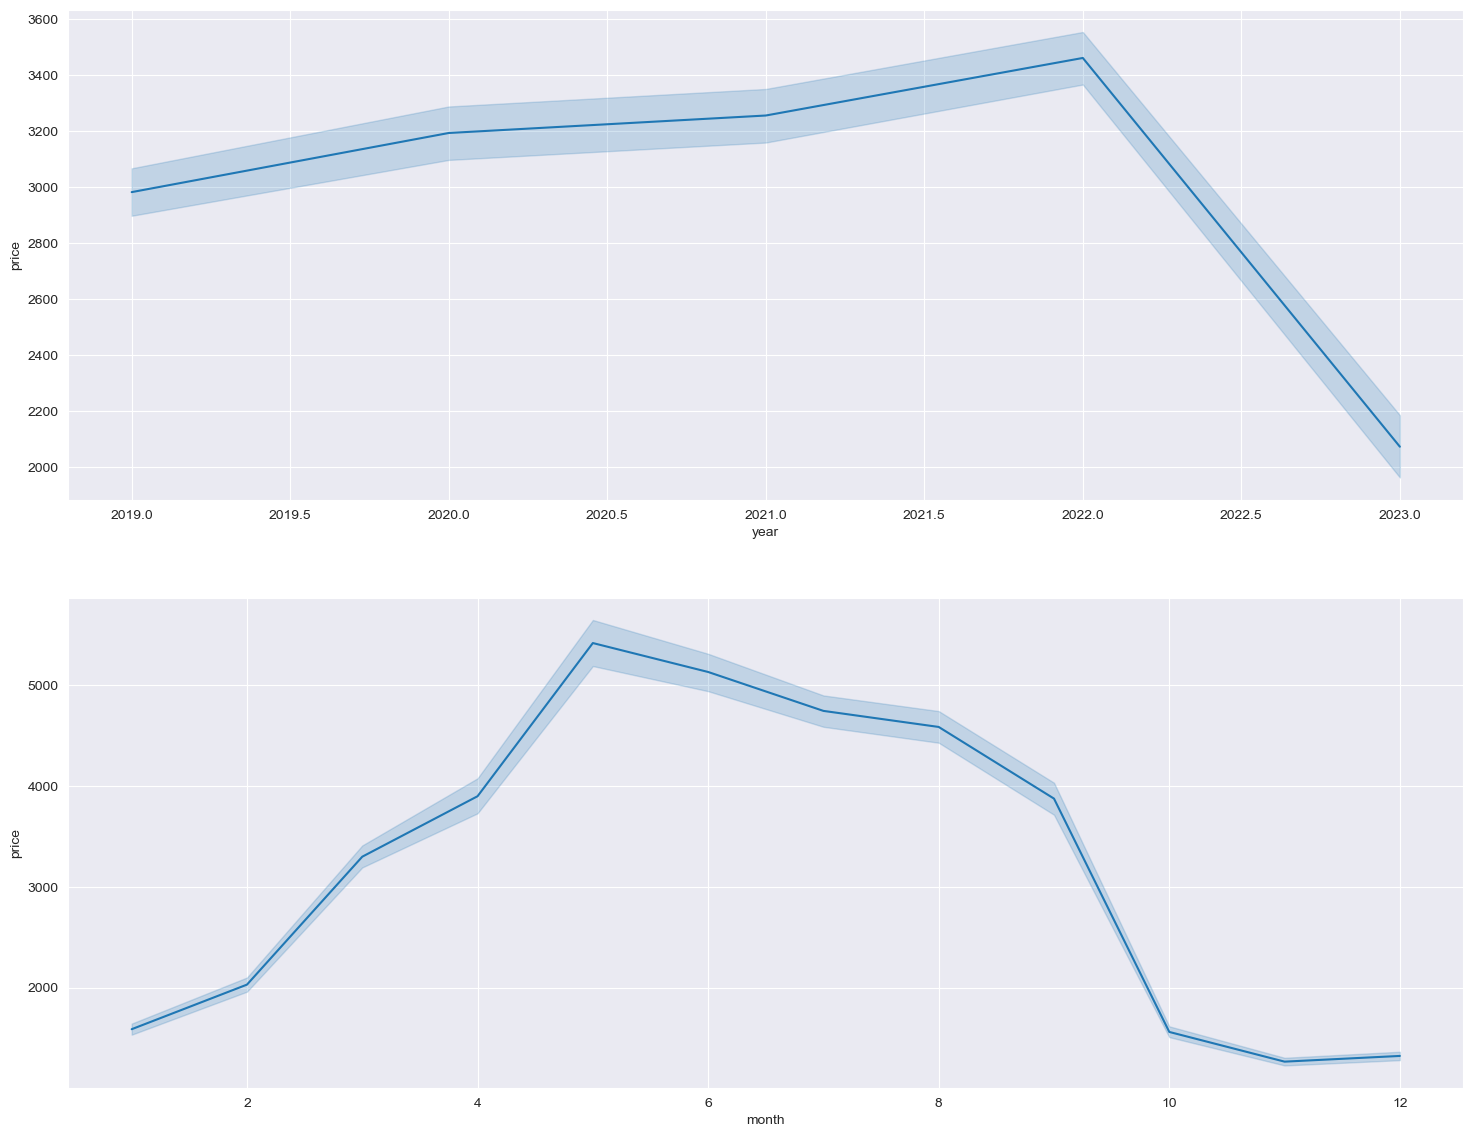

In [31]:
plot(df_tg)

/var/folders/6s/ll28mtr94zl68pc_d72v5ggh0000gn/T/ipykernel_43050/468456747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='year',y='price',ax=axes[0,0],palette='husl')


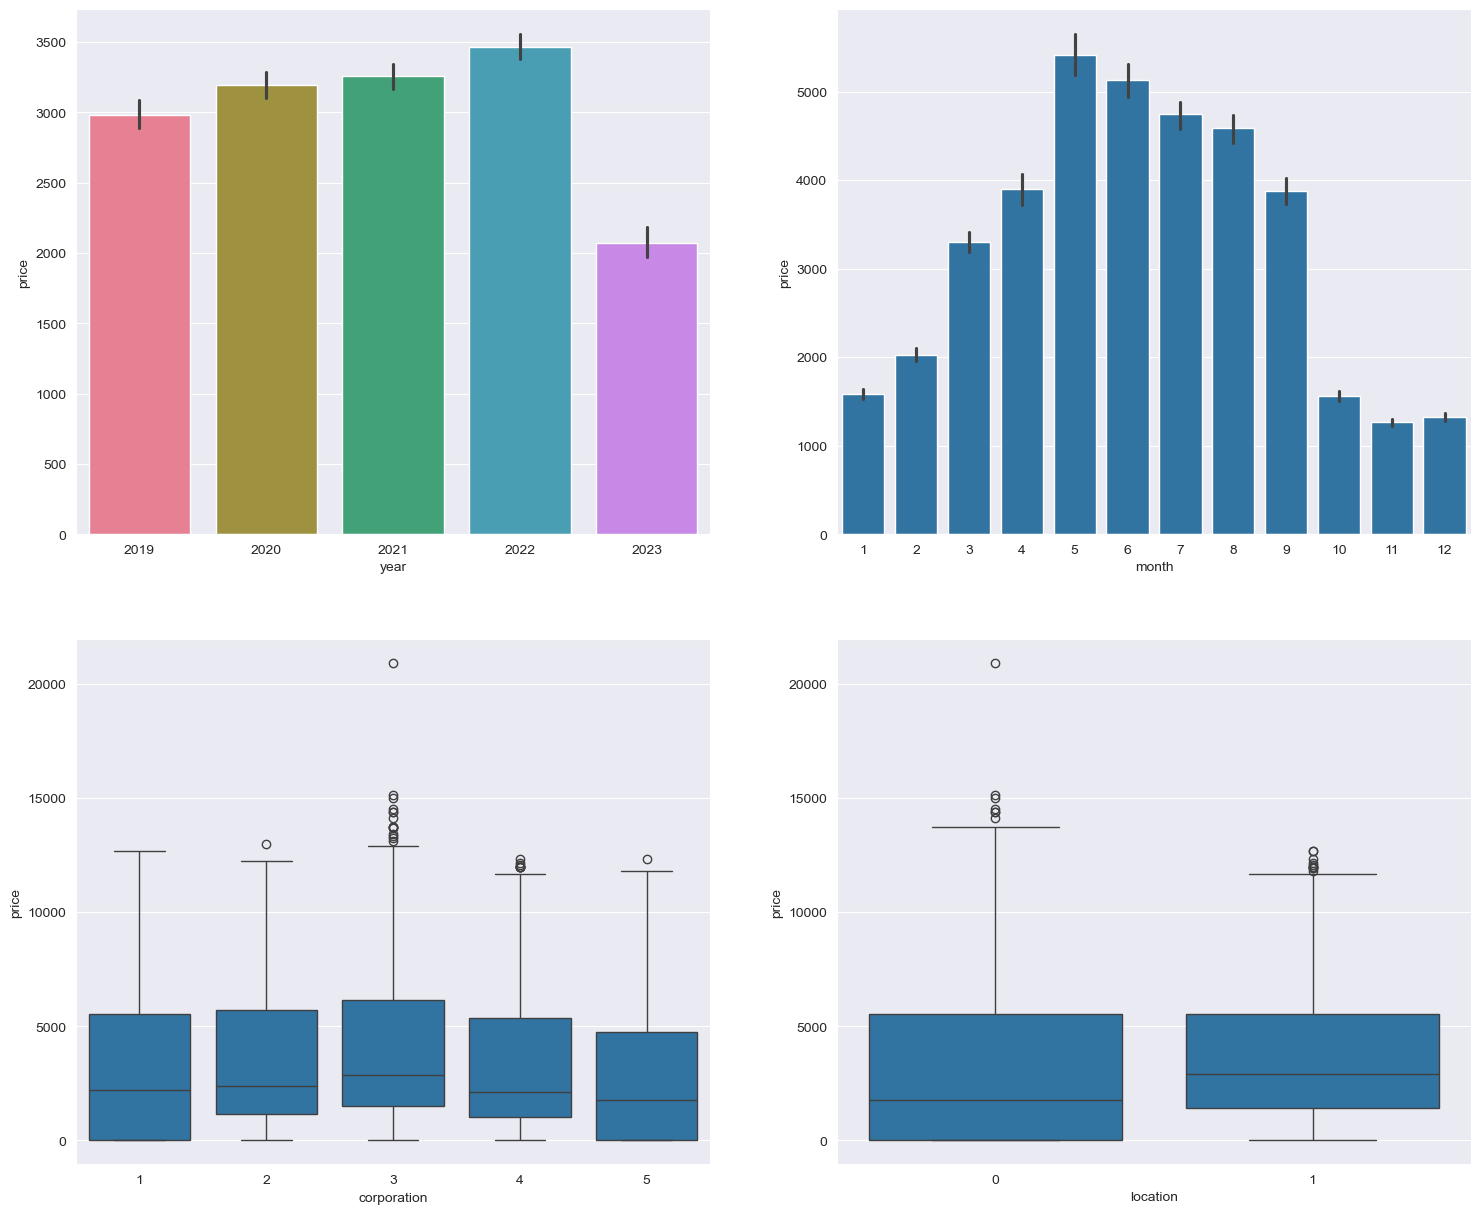

In [32]:
graph(df_tg)

### 브로콜리 (broccoli)

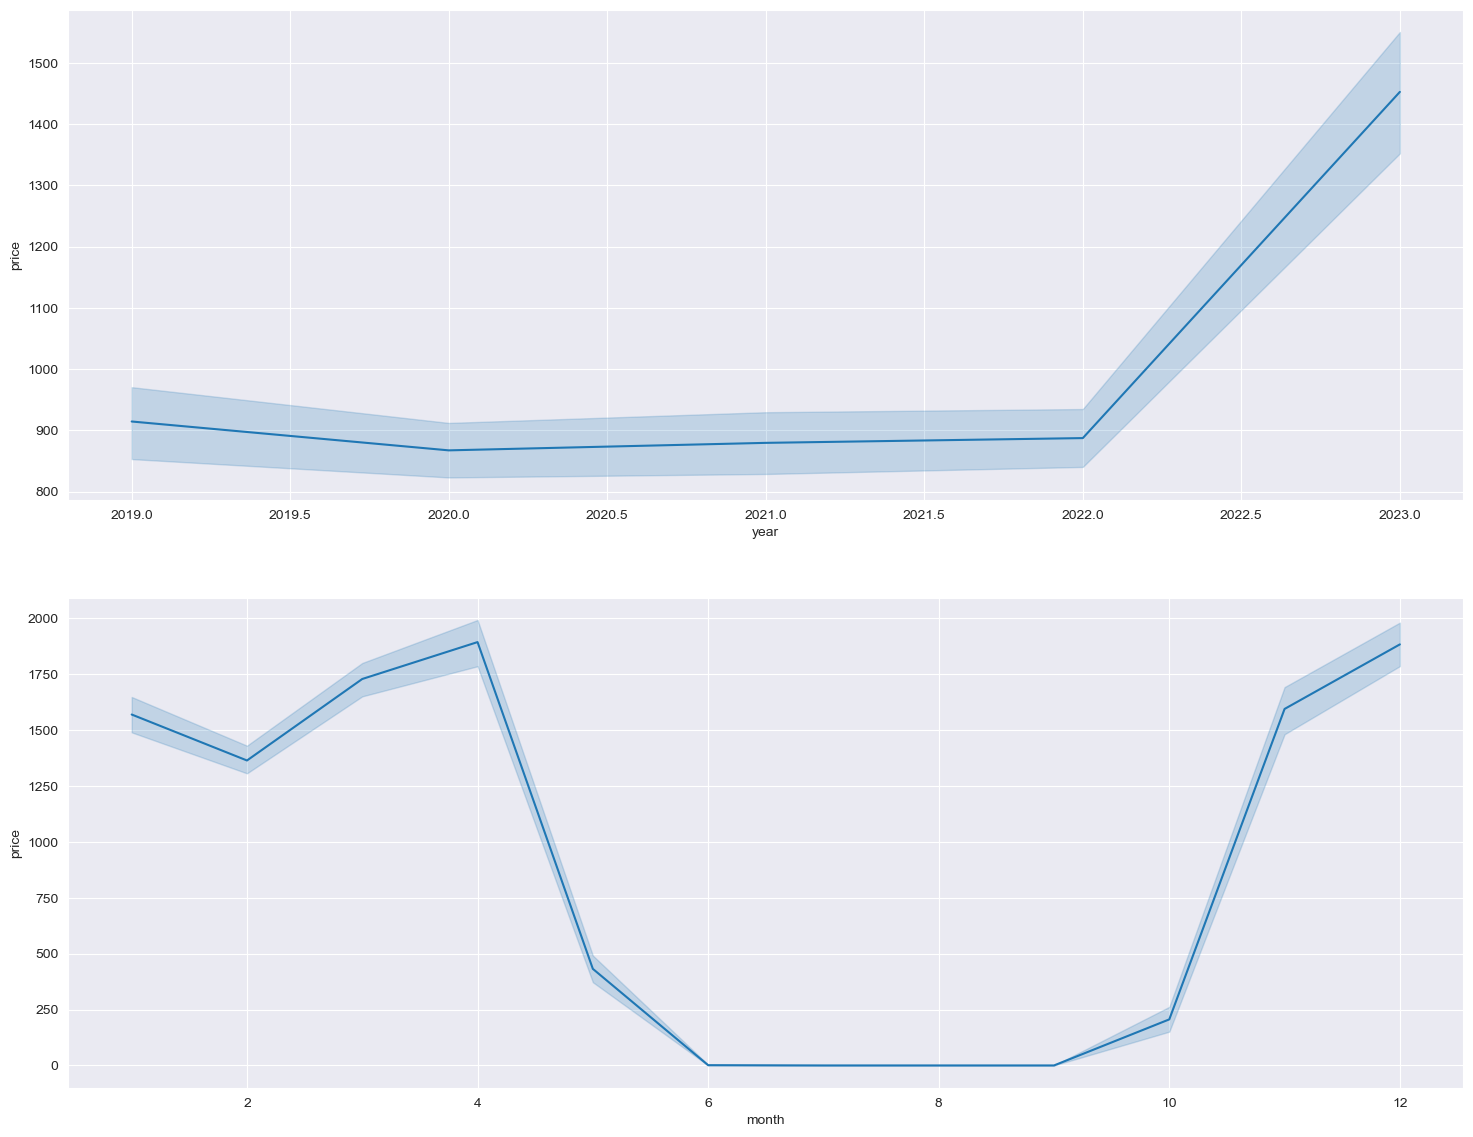

In [33]:
plot(df_bc)

/var/folders/6s/ll28mtr94zl68pc_d72v5ggh0000gn/T/ipykernel_43050/468456747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='year',y='price',ax=axes[0,0],palette='husl')


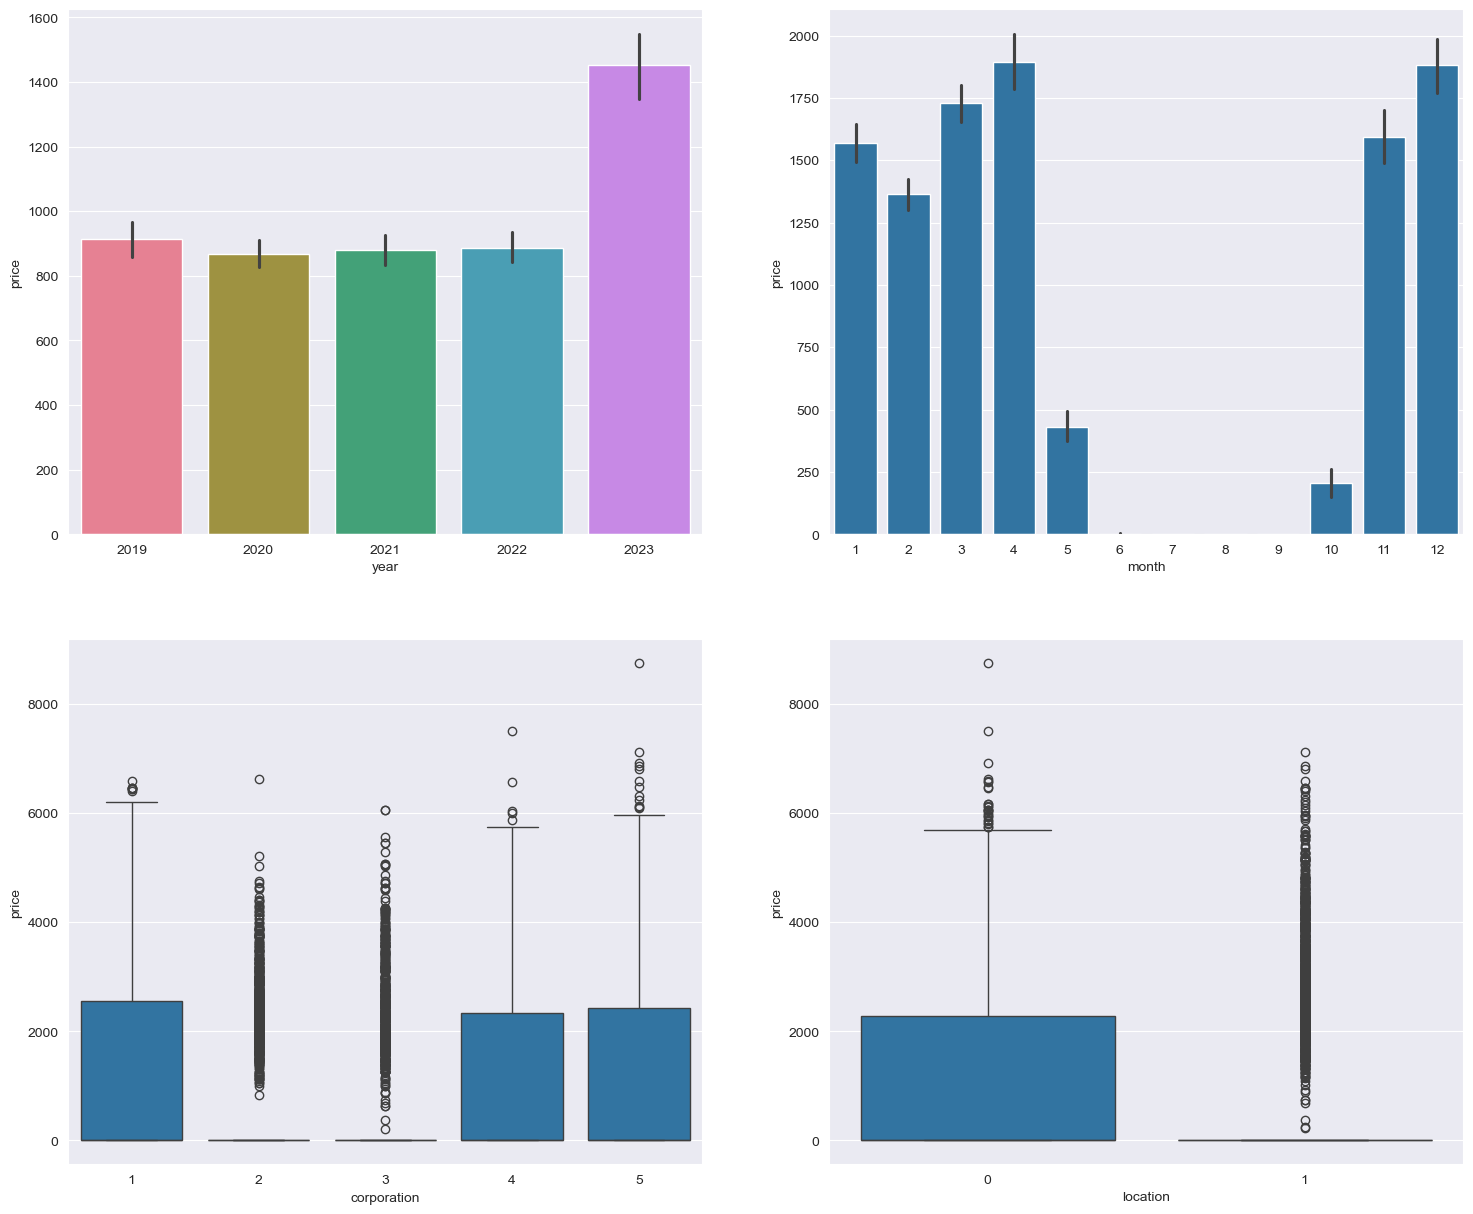

In [34]:
graph(df_bc)

### 무 (Raddish)

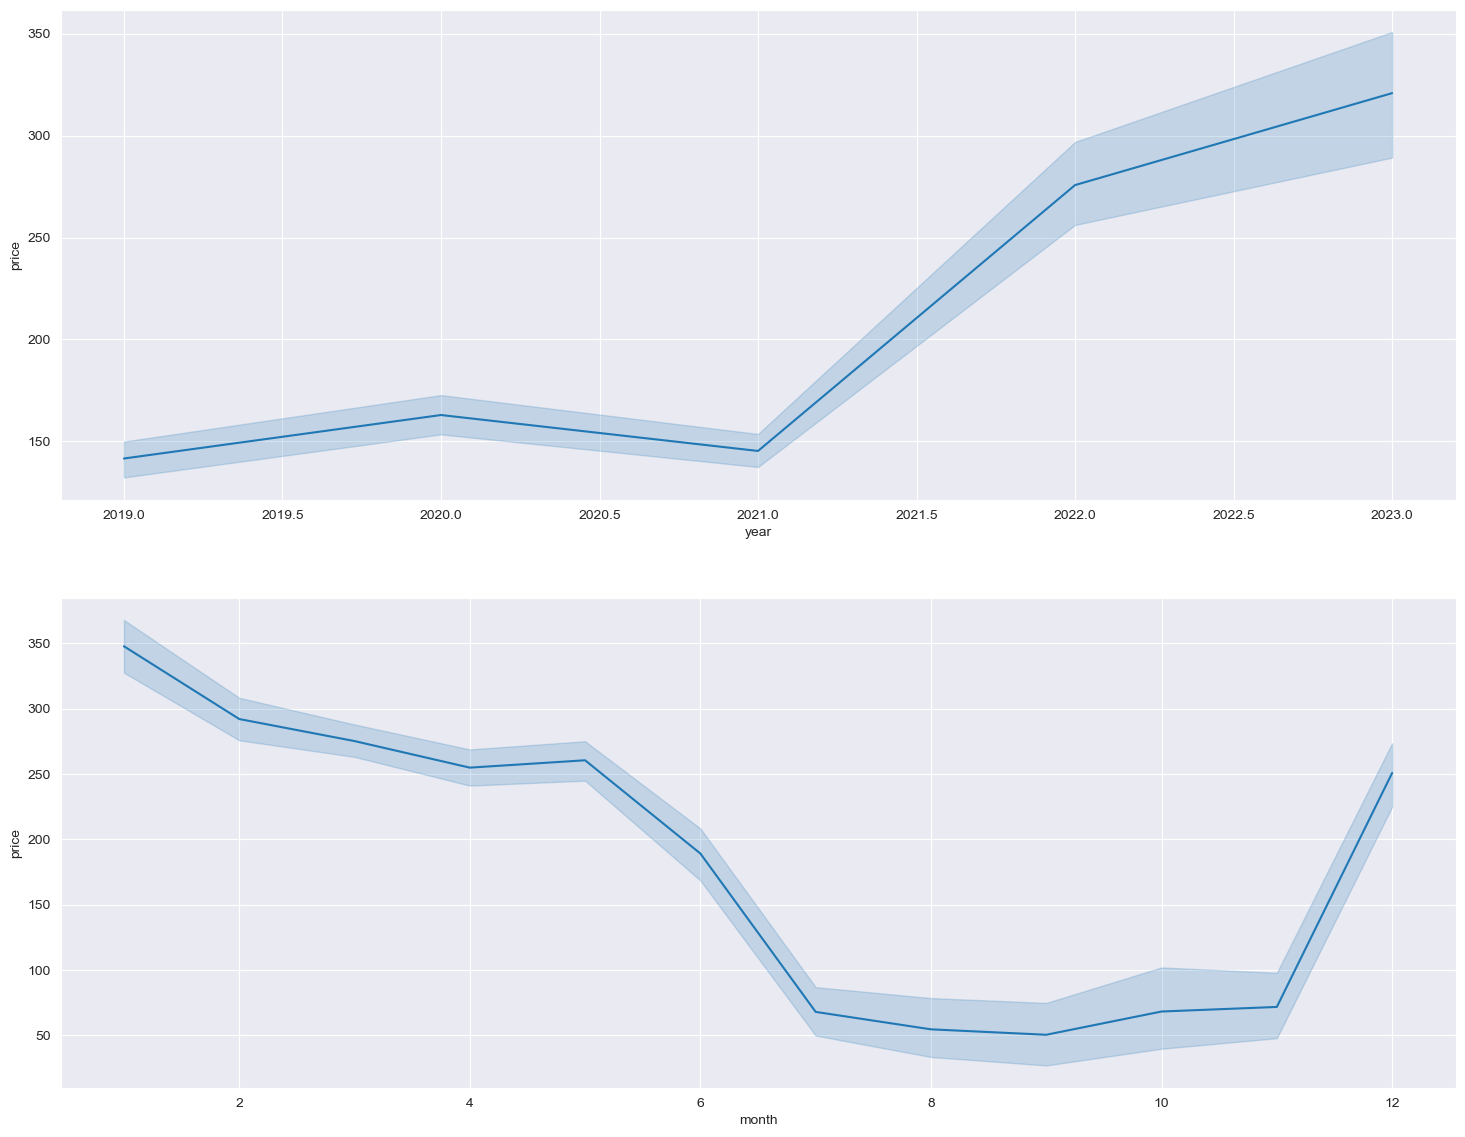

In [35]:
plot(df_rd)

/var/folders/6s/ll28mtr94zl68pc_d72v5ggh0000gn/T/ipykernel_43050/468456747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='year',y='price',ax=axes[0,0],palette='husl')


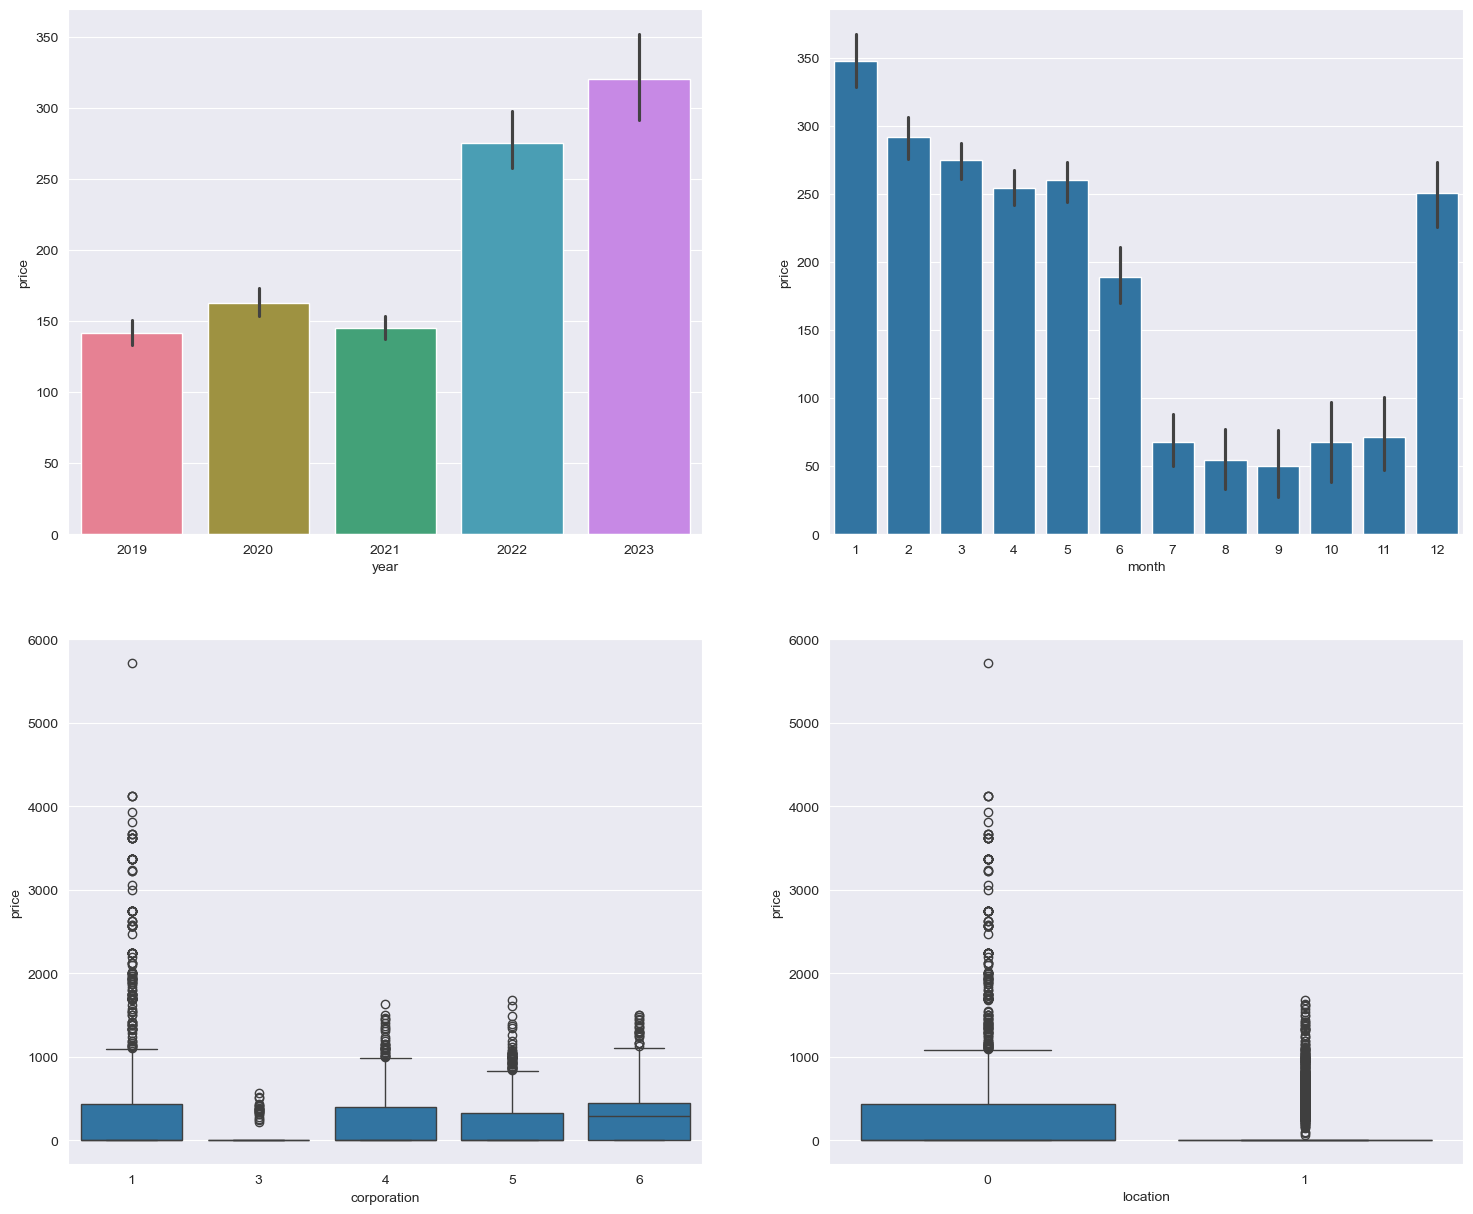

In [36]:
graph(df_rd)

### 당근 (Carrot)

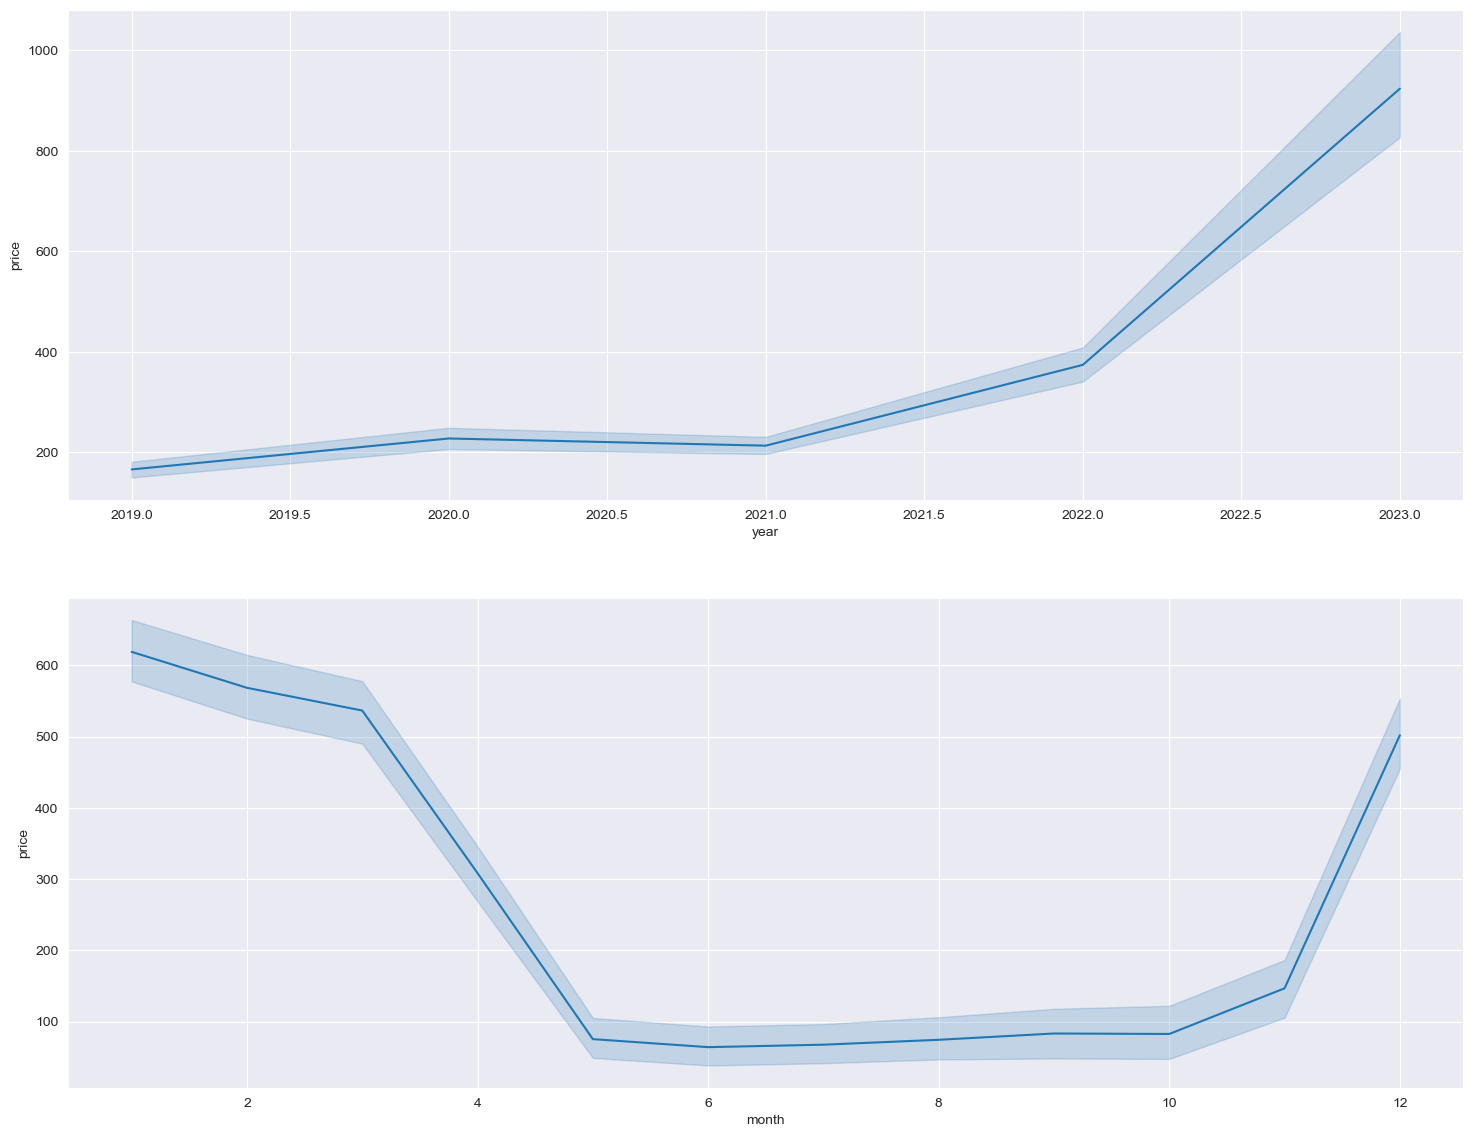

In [37]:
plot(df_cr)

/var/folders/6s/ll28mtr94zl68pc_d72v5ggh0000gn/T/ipykernel_43050/468456747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='year',y='price',ax=axes[0,0],palette='husl')


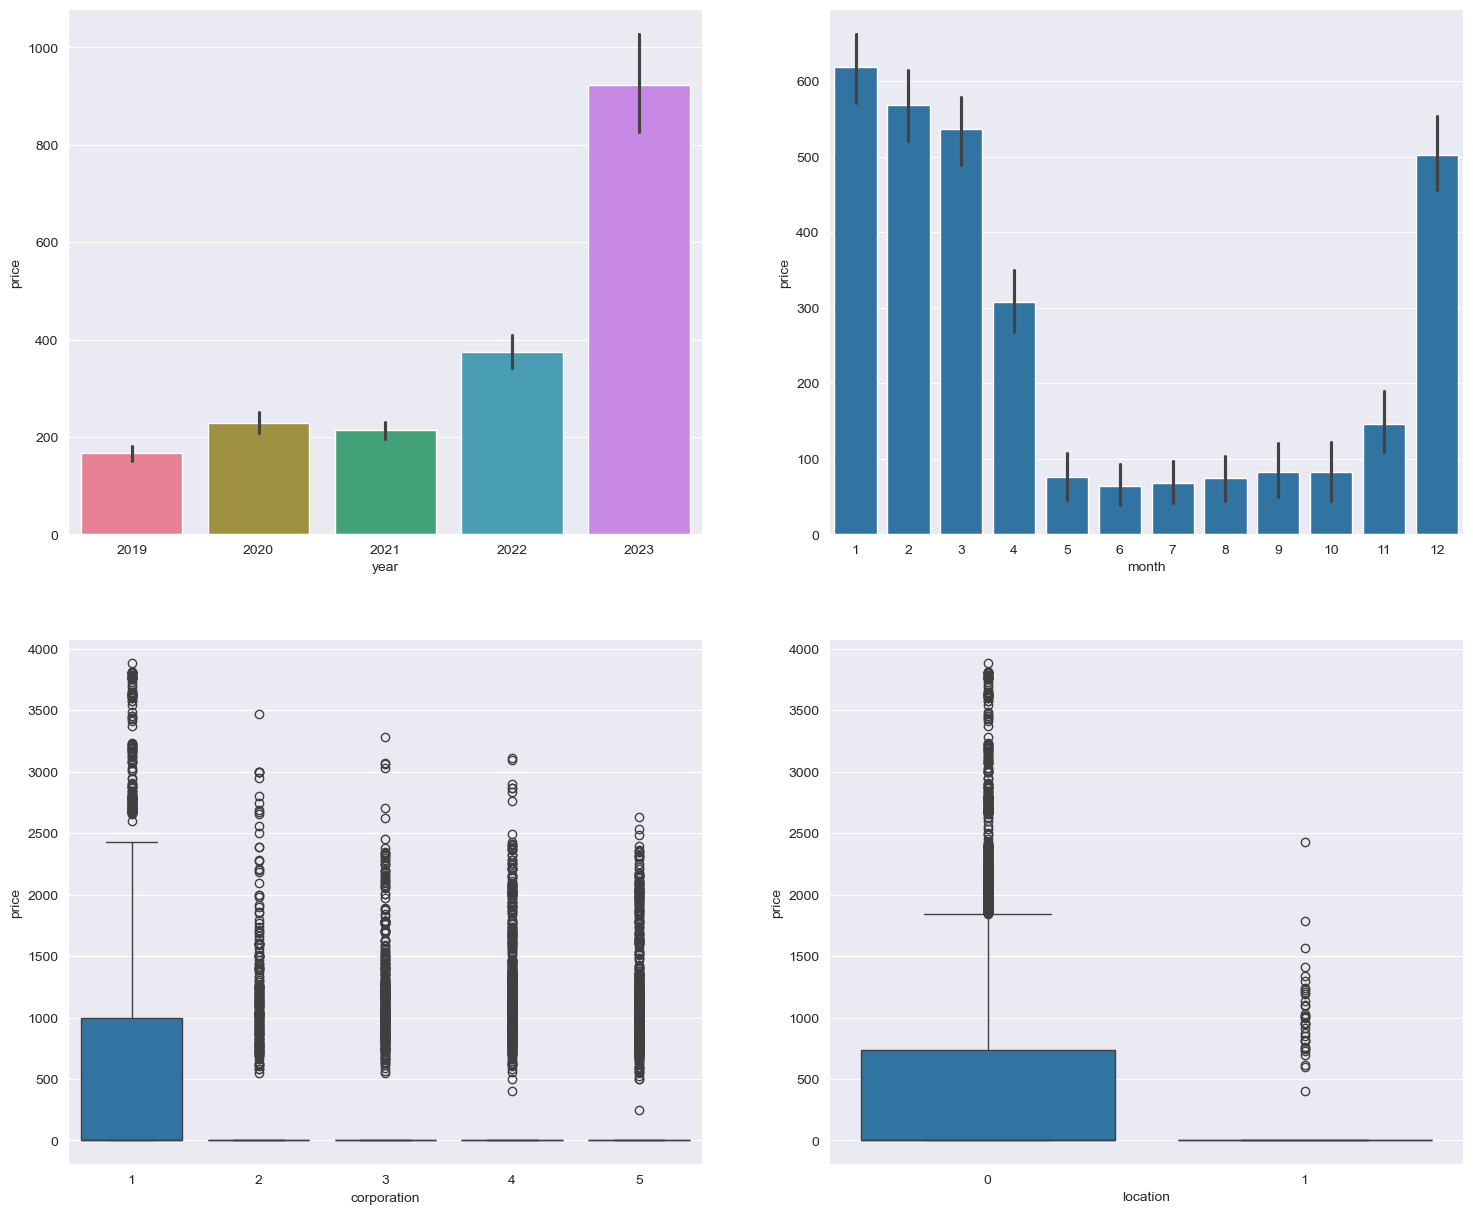

In [38]:
graph(df_cr)

### 양배추 (Cabbage)

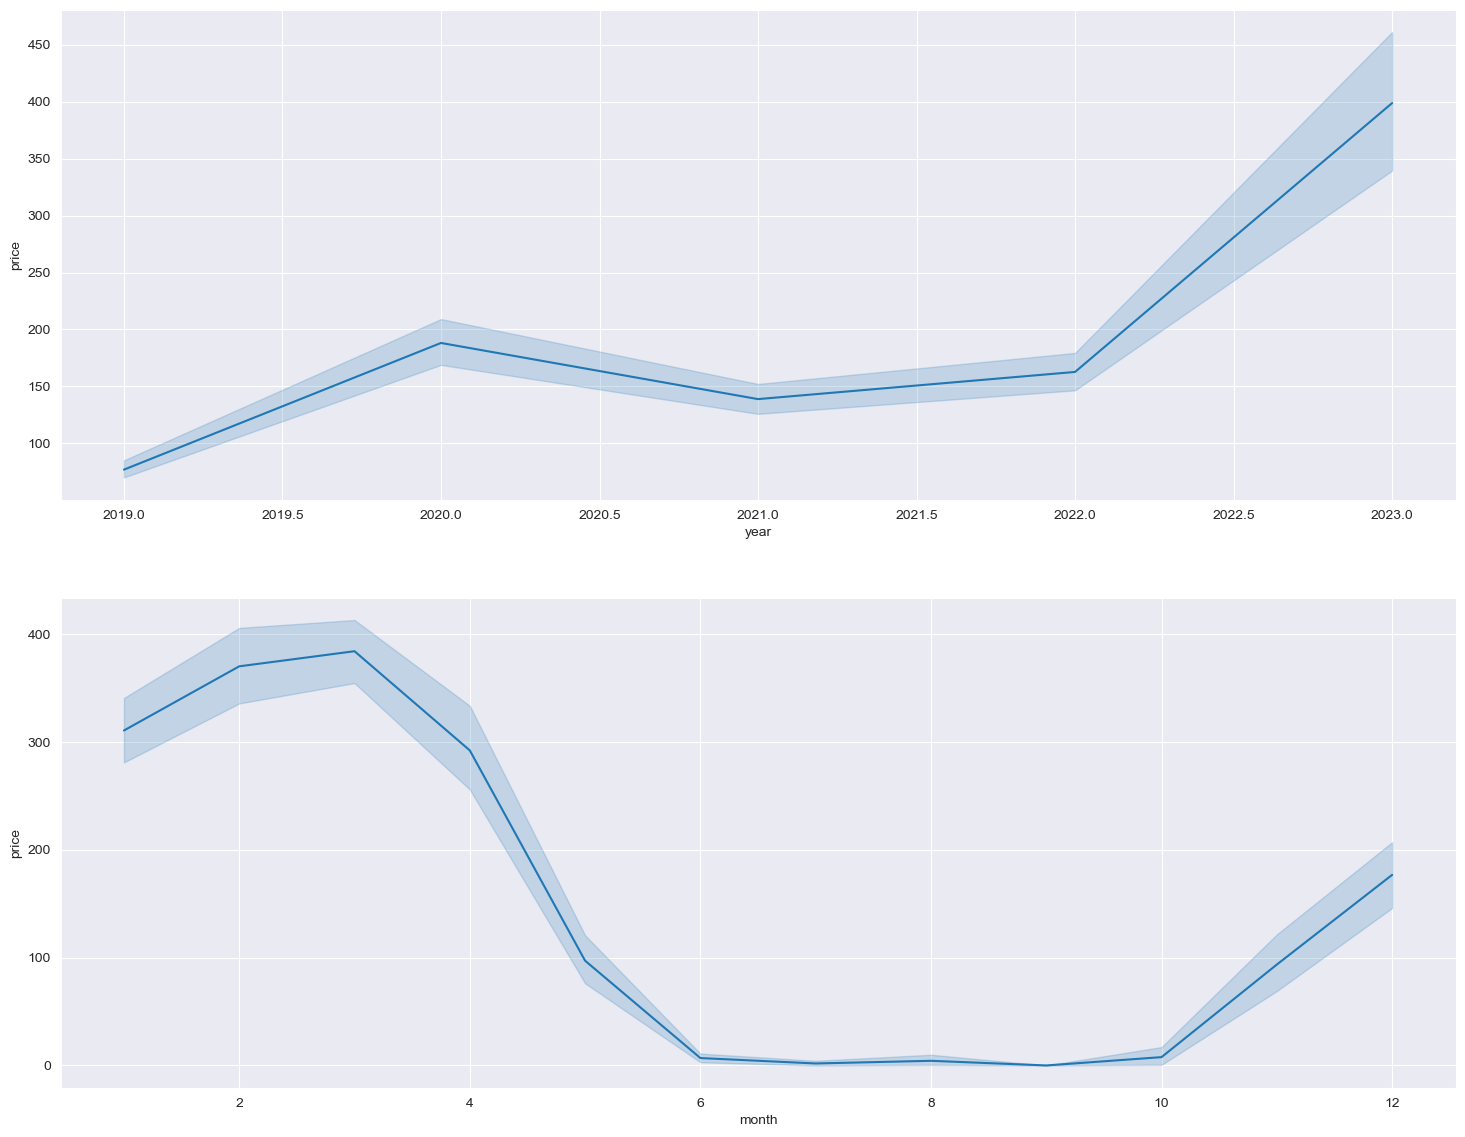

In [39]:
plot(df_cb)

/var/folders/6s/ll28mtr94zl68pc_d72v5ggh0000gn/T/ipykernel_43050/468456747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='year',y='price',ax=axes[0,0],palette='husl')


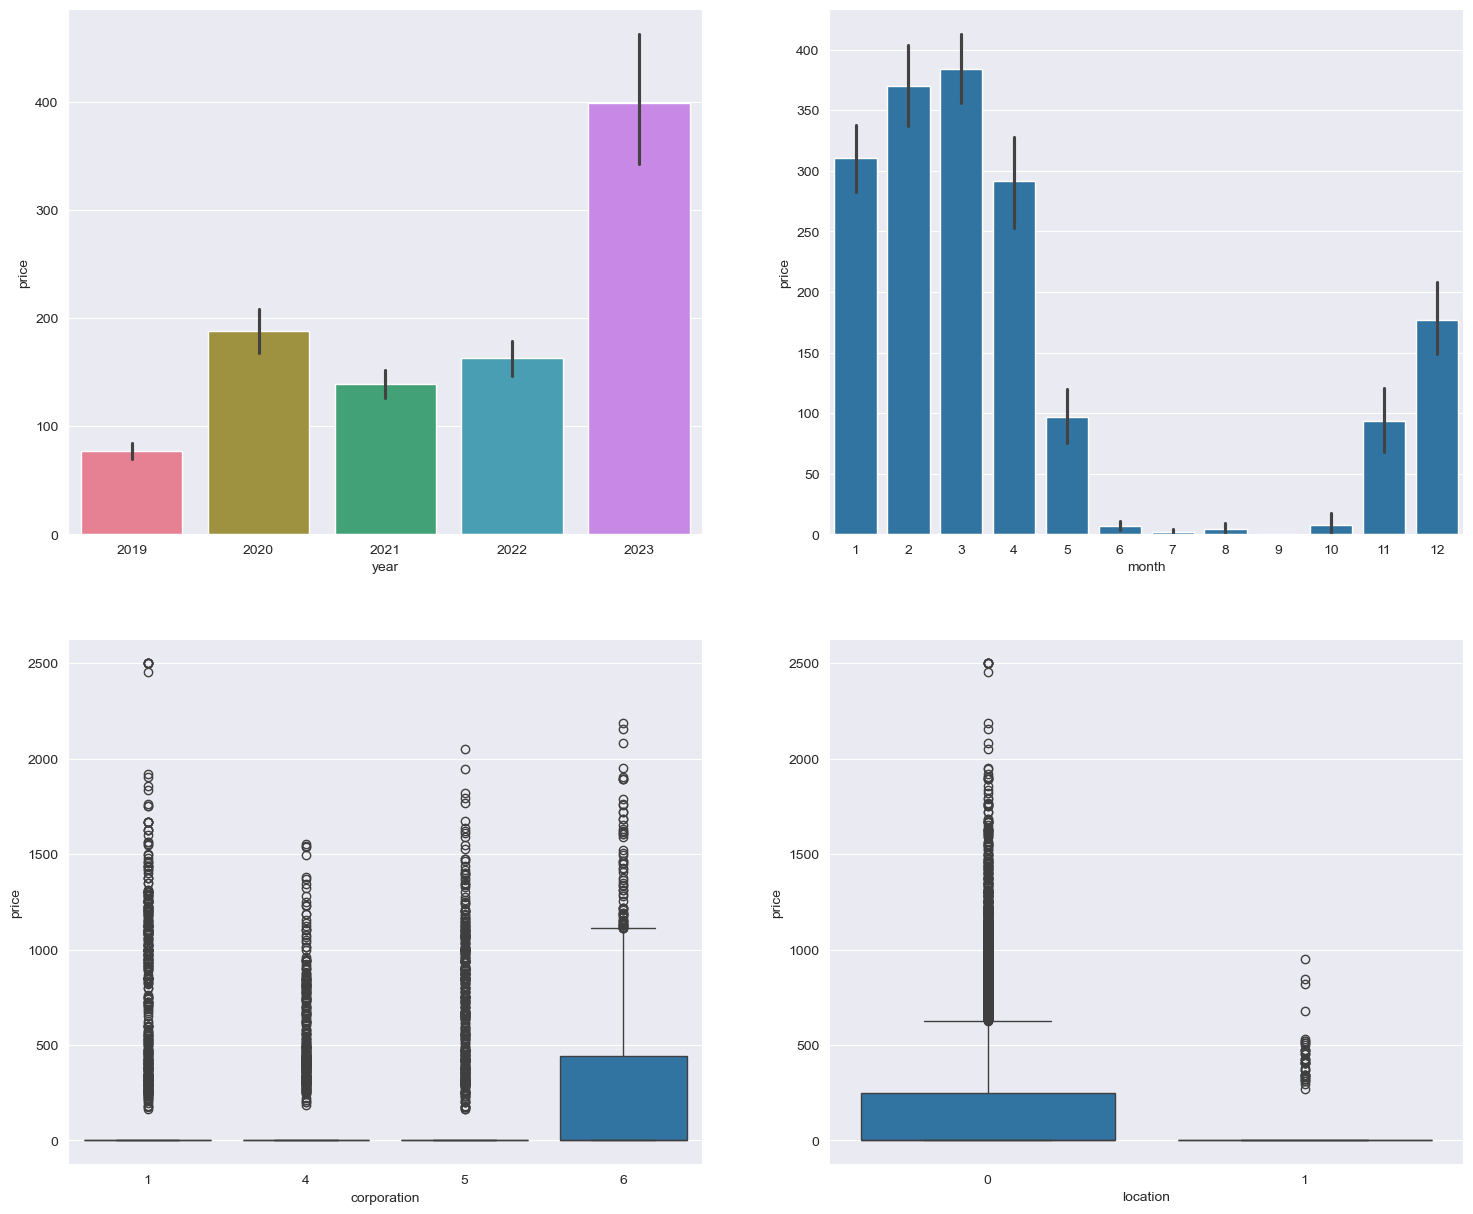

In [40]:
graph(df_cb)

# 이상치 제거 (Remove outliers)

df_tg,df_bc,df_rd,df_cr,df_cb

당근은 극단적인 이상치로 판단되는 값은 없는 것으로 보여 우선 다른 작물들에 대한 극 이상치만 제거해주었음
(Carrots did not appear to have any values that were considered extreme outliers, so only the extreme outliers for other crops were first removed.)

In [41]:
tg_idx = df_tg[df_tg['price']>20000].index
bc_idx = df_bc[df_bc['price']>5000].index
rd_idx = df_rd[df_rd['price']>8000].index
cb_idx = df_cb[df_cb['price']>2300].index

df_tg.drop(tg_idx, inplace=True)
df_bc.drop(bc_idx, inplace=True)
df_rd.drop(rd_idx, inplace=True)
df_cb.drop(cb_idx, inplace=True)

In [42]:
tg_idx

Index([7304], dtype='int64')

# 추후 할 것 (to do later)
-----------------------------
- 피처 추가(필요시에 추가, 추가 안 해도 괜찮음) (Add features (add when necessary, it’s okay if you don’t add))
- 딥러닝 모델로 학습을 진행하실 떼 적용하고 싶으신 피처가 있다면 추가해주셔도 됩니다 (If there are any features you would like to apply when training with a deep learning model, you can add them.)
- 이외에 필요하다고 느껴지는 것 (Anything else you feel you need)
-------------------------------
## LSTM training
What if the data is normalized/scaled instead of having to remove outliers?

/var/folders/6s/ll28mtr94zl68pc_d72v5ggh0000gn/T/ipykernel_43050/468456747.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='year',y='price',ax=axes[0,0],palette='husl')


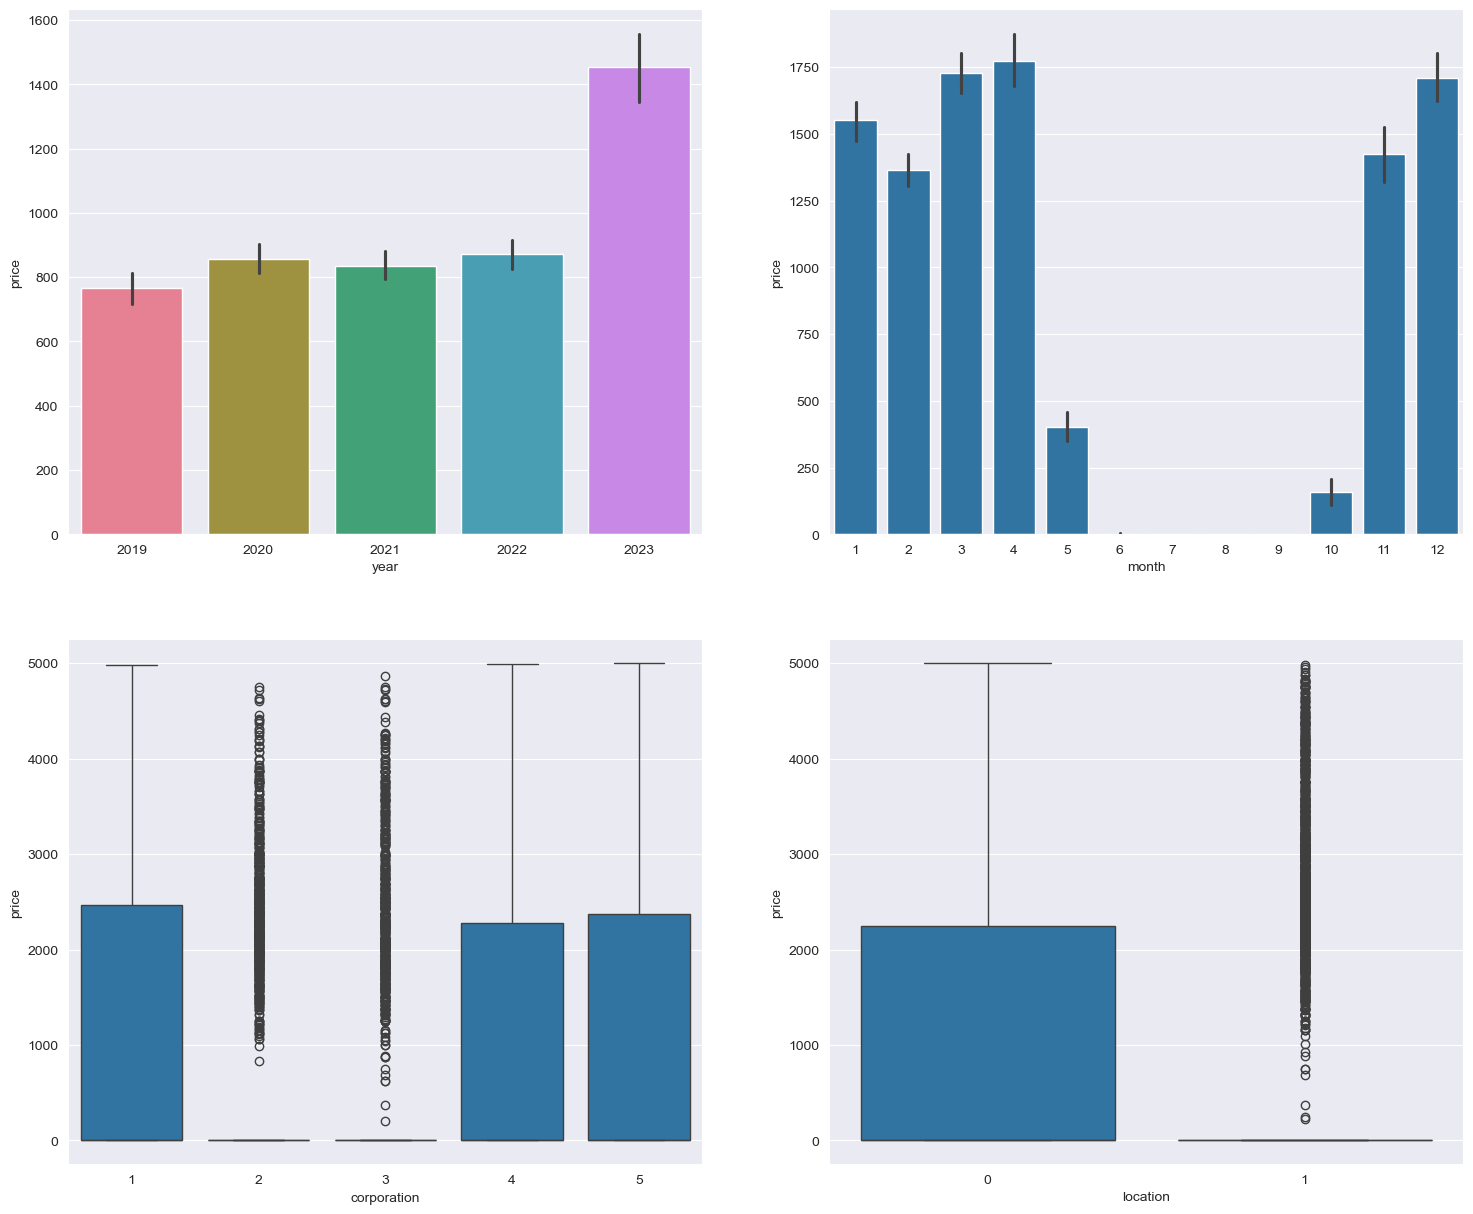

In [43]:
graph(df_bc)

In [44]:
from sklearn.preprocessing import MinMaxScaler
import torch
from torchvision import transforms
from torch import nn
from torch.nn import functional as F
import time

In [45]:
traindf

,ID,item,corporation,location,supply(kg),price(krw/kg)
timestamp,,,,,,
2019-01-01,TG_A_J_20190101,TG,A,J,0.0,0.0
2019-01-02,TG_A_J_20190102,TG,A,J,0.0,0.0
2019-01-03,TG_A_J_20190103,TG,A,J,60601.0,1728.0
2019-01-04,TG_A_J_20190104,TG,A,J,25000.0,1408.0
2019-01-05,TG_A_J_20190105,TG,A,J,32352.0,1250.0
...,...,...,...,...,...,...
2023-02-27,RD_F_J_20230227,RD,F,J,452440.0,468.0
2023-02-28,RD_F_J_20230228,RD,F,J,421980.0,531.0
2023-03-01,RD_F_J_20230301,RD,F,J,382980.0,574.0


In [46]:
testdf = test.copy()
testdf['timestamp']  = pd.to_datetime(testdf['timestamp'])
testdf.set_index('timestamp', inplace = True)
testdf

,ID,item,corporation,location
timestamp,,,,
2023-03-04,TG_A_J_20230304,TG,A,J
2023-03-05,TG_A_J_20230305,TG,A,J
2023-03-06,TG_A_J_20230306,TG,A,J
2023-03-07,TG_A_J_20230307,TG,A,J
2023-03-08,TG_A_J_20230308,TG,A,J
...,...,...,...,...
2023-03-27,RD_F_J_20230327,RD,F,J
2023-03-28,RD_F_J_20230328,RD,F,J
2023-03-29,RD_F_J_20230329,RD,F,J


In [47]:
# trainseries = traindf[['price(krw/kg)']]
# traindata = trainseries.values
# trainsize = int(len(traindata) * .80)
# valsize = len(traindata) - trainsize
# for_train, for_valid = traindata[:trainsize], traindata[trainsize:] 

In [48]:
# for_valid

array([[   0.],
       [1296.],
       [   0.],
       ...,
       [ 574.],
       [ 523.],
       [ 529.]])

In [74]:
bcprice = df_bc[['timestamp', 'price']].set_index('timestamp')
tgprice = df_tg[['timestamp', 'price']].set_index('timestamp')
rdprice = df_rd[['timestamp', 'price']].set_index('timestamp')
cbprice = df_cb[['timestamp', 'price']].set_index('timestamp')
crprice = df_cr[['timestamp', 'price']].set_index('timestamp')

In [81]:
def split_data(data):
    train_size = int(len(data) * .80)
    test_size = len(data) - train_size
    for_train, for_test = data[:train_size], data[train_size:]
    return for_train, for_test

In [78]:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
# scaled_traindata = min_max_scaler.fit_transform(traindata)

In [79]:
def scale_dataset(dataset):
    scaled_data = min_max_scaler.fit_transform(dataset)
    return scaled_data

In [80]:
scaled_bcprice = scale_dataset(bcprice)
scaled_bcprice

array([[0.    ],
       [0.    ],
       [0.5118],
       ...,
       [0.7632],
       [0.6642],
       [0.5878]])

In [87]:
sc_bc_train, sc_bc_test = split_data(scaled_bcprice)

In [85]:
# min_max_scaler = MinMaxScaler(feature_range=(0, 1))
def create_dataset(dataset, lookback):
    X, y = [], []
    # dataset = min_max_scaler.fit_transform(dataset.reshape(-1,1))
    for i in range(len(dataset)-lookback):
        feature = dataset[i:i+lookback]
        target = dataset[i+1:i+lookback+1]
        X.append(feature)
        y.append(target)
    return torch.tensor(X), torch.tensor(y)

In [88]:
lookback = 10
Xbc_train, ybc_train = create_dataset(sc_bc_train, lookback)
Xbc_test, ybc_test = create_dataset(sc_bc_test, lookback)
print(Xbc_train.shape, ybc_train.shape)
print(Xbc_test.shape, ybc_test.shape)

torch.Size([10836, 10, 1]) torch.Size([10836, 10, 1])
torch.Size([2702, 10, 1]) torch.Size([2702, 10, 1])


In [89]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.lstm = nn.LSTM(input_size=1, hidden_size=50, num_layers=1, batch_first=True)
        self.linear = nn.Linear(50, 1)
    def forward(self, x):
        x, _ = self.lstm(x)
        x = self.linear(x)
        return x

In [90]:
model = Model()

In [91]:
epochs = 30
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=1.)

In [92]:
from torch import backends
device = (
    'cuda'
    if torch.cuda.is_available()
    else 'mps'
    if backends.mps.is_available()
    else 'cpu'
)
print(f'using {device}')

using mps


In [93]:
import torch.utils.data as data
loader = data.DataLoader(data.TensorDataset(Xbc_train, ybc_train), shuffle=True, batch_size=8)

In [94]:
model = model.to(device, dtype = torch.float32)
Xbc_train = Xbc_train.to(device, dtype = torch.float32)
Xbc_test = Xbc_test.to(device, dtype = torch.float32)
ybc_train = ybc_train.to(device, dtype = torch.float32)
ybc_test = ybc_test.to(device, dtype = torch.float32)

In [95]:
for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in loader:
        y_pred = model(X_batch.to(device, dtype = torch.float32))
        loss = criterion(y_pred, y_batch.to(device, dtype = torch.float32))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # if epoch % 100 != 0:
    #     continue
    model.eval()
    with torch.no_grad():
        y_pred = model(Xbc_train)
        train_rmse = torch.sqrt(criterion(y_pred, ybc_train))
        y_pred = model(Xbc_test)
        test_rmse = torch.sqrt(criterion(y_pred, ybc_test))
    print("Epoch %d: train RMSE %.4f, test RMSE %.4f" % (epoch, train_rmse, test_rmse))

Epoch 0: train RMSE 0.1590, test RMSE 0.1881
Epoch 1: train RMSE 0.1510, test RMSE 0.1762
Epoch 2: train RMSE 0.1496, test RMSE 0.1757
Epoch 3: train RMSE 0.1497, test RMSE 0.1768
Epoch 4: train RMSE 0.1498, test RMSE 0.1773
Epoch 5: train RMSE 0.1495, test RMSE 0.1770
Epoch 6: train RMSE 0.1475, test RMSE 0.1746
Epoch 7: train RMSE 0.1476, test RMSE 0.1758
Epoch 8: train RMSE 0.1480, test RMSE 0.1774
Epoch 9: train RMSE 0.1458, test RMSE 0.1747
Epoch 10: train RMSE 0.1452, test RMSE 0.1754
Epoch 11: train RMSE 0.1462, test RMSE 0.1754
Epoch 12: train RMSE 0.1448, test RMSE 0.1746
Epoch 13: train RMSE 0.1461, test RMSE 0.1756
Epoch 14: train RMSE 0.1441, test RMSE 0.1748
Epoch 15: train RMSE 0.1457, test RMSE 0.1755
Epoch 16: train RMSE 0.1434, test RMSE 0.1751
Epoch 17: train RMSE 0.1448, test RMSE 0.1782
Epoch 18: train RMSE 0.1433, test RMSE 0.1767
Epoch 19: train RMSE 0.1437, test RMSE 0.1770
Epoch 20: train RMSE 0.1419, test RMSE 0.1769
Epoch 21: train RMSE 0.1430, test RMSE 0.177

In [65]:
model

Model(
  (lstm): LSTM(1, 50, batch_first=True)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

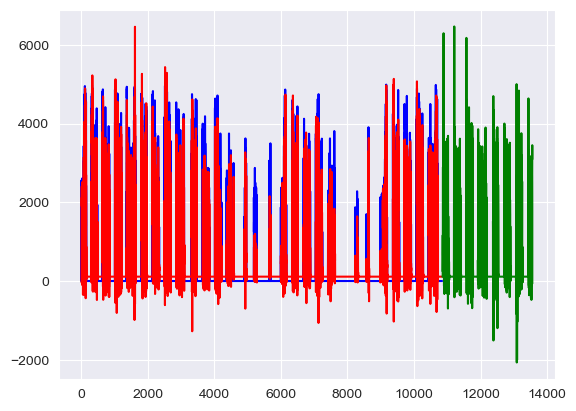

In [100]:
with torch.no_grad():
    train_plot = np.ones_like(bcprice) * np.nan
    y_pred = model(Xbc_train)
    y_pred =y_pred[:, -1, :].detach().cpu().numpy()
    y_pred_unscaled = min_max_scaler.inverse_transform(y_pred)
    train_plot[lookback:len(sc_bc_train)] = y_pred_unscaled
    test_plot = np.ones_like(bcprice) * np.nan
    y_test_pred = model(Xbc_test)[:, -1, :].detach().cpu().numpy()
    y_test_pred_unscaled = min_max_scaler.inverse_transform(y_test_pred)
    test_plot[len(sc_bc_train) + lookback:len(bcprice)] = y_test_pred_unscaled
    sc_bc_train_unscaled = min_max_scaler.inverse_transform(sc_bc_train)
    
plt.plot(sc_bc_train_unscaled, c = 'b')
plt.plot(train_plot, c = 'r')
plt.plot(test_plot, c = 'g')
plt.show()

In [ ]:
# def get_corrects(logit, target):
#     corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
#     return corrects.item()

In [ ]:
# hist = np.zeros(epochs)
# start_time = time.time()
# lstm = []
# for t in range(epochs):
#     y_train_pred = model(X_train.float())
#     loss = criterion(y_train_pred, y_train)
#     print("Epoch ", t, "MSE: ", loss.item())
#     hist[t] = loss.item()
#     optimizer.zero_grad(set_to_none = True)
#     loss.backward()
#     optimizer.step()
# 
# training_time = time.time()-start_time
# print("Training time: {}".format(training_time))